# Unidad III - Sistemas de Ecuaciones Lineales

## Métodos directos
* Sustitucion hacia adelante/atras
* Eliminacion de Gauss
* Descomposicion LU con/sin pivoteo parcial escalado
* Cholesky
* Thomas

In [305]:
import numpy as np

In [97]:
a = np.array([[5,2,3],[2,7,-4],[3,-4,9.]])
b = np.array([8,-2,12.])

c = np.array([[1,0,0],[1,2,0],[3,2,1.]])
d = np.array([1,5,10.])

In [99]:
def sust_atras(a,b):
    n = len(a) - 1
    x = np.zeros_like(b)
    x[n] = b[n]/a[n,n]
    for i in range(n-1,-1,-1):
        x[i] = (b[i] - (a[i,i+1:] * x[i+1:]).sum()) /a[i,i]
    return x
    
def sust_adelante(a,b):
    n = len(a)
    x = np.zeros_like(b)
    x[0] = b[0]/a[0,0]
    for i in range(1,n):
        x[i] = (b[i] - (a[i,:i]*x[:i]).sum()) / a[i,i]
    return(x)


In [111]:
def elim_gauss(a,b):
    n = len(a)

    # Fase de eliminacion
    for k in range(n):
        for i in range(k+1,n):
            m = a[i,k]/a[k,k]          # Calculo del multiplicador
            a[i,k:] -= a[k,k:] * m     # Operacion elemental de fila
            b[i] -= b[k]*m             # Se aplica la misma operacion al termino independiente

    # Fase de sustitucion
    return sust_atras(a,b)


In [123]:
def lu(a):
    n = len(a)
    l = np.eye(n)
    for k in range(n):
        for i in range(k+1,n):
            m = a[i,k]/a[k,k]         # Calculo del multiplicador
            l[i,k] = m                # Almaceno el m en la matriz l
            a[i,k:] -= a[k,k:] * m    # Operacion elemental de fila
    return l,a
    

In [129]:
def lu_ppe(a):
    n = len(a)
    l = np.eye(n)
    p = np.arange(n)
    s = np.abs(a).max(axis=1)
    for k in range(n):
        pivot = np.abs(a[k:,k]/s[k:]).argmax() + k     # Eleccion del elem con mayor valor abs
        
        # Hay cambio de elemento pivot
        if (pivot != k):
            p[k], p[pivot] = p[pivot], p[k]            # Se cambia los indices del vector de permutaciones
            a[[pivot,k],:] = a[[k,pivot],:]            # Se intercambian la fila k y del nuevo pivot
            l[[pivot,k],:k] = l[[k,pivot],:k]          # Lo mismo en l
        
        # Eliminacion (exactamente igual que sin pivoteo)
        for i in range(k+1,n):
            m = a[i,k]/a[k,k]
            l[i,k] = m
            a[i,k:] -= a[k,k:] * m
            
    p = np.eye(n)[p]                                   # Creo la matriz de permutacion a partir del vector p
    return p,l,a

In [131]:
def cholesky(a):
    n = len(a)
    l = np.zeros_like(a)
    for i in range(n):
        l[i,i] = np.sqrt(a[i,i] - (l[i, :i]**2).sum())               # Elementos de la diagonal
        for j in range(i+1,n):
            l[j,i] = (a[j,i] - (l[j, :i]*l[i, :i]).sum() ) / l[i,i]  # Elementos por debajo de la diagonal
    return l

In [744]:
def thomas(a,b):
    n = len(a)
    x = np.zeros_like(b)
    
    # Descomposicion
    for i in range(1,n):
        a[i,i-1] /= a[i-1,i-1]        # e
        a[i,i] -= a[i,i-1]*a[i-1,i]   # f
        
    # Sustitucion hacia adelante
    for i in range(1,n):
        b[i] -= b[i-1] * a[i,i-1]

    #Sustitucion hacia atras
    x[-1] = b[-1]/a[-1,-1]
    for i in range(n-2,-1,-1):
        x[i] = (b[i]-a[i,i+1]*x[i+1])/ a[i,i]
        
    return x
    

## Métodos iterativos
* Gauss-Jacobi
* Gauss-Seidel
* SOR

In [748]:
def gauss_jacobi(a,b,xant,maxIter,eps):
    it = 0
    n = len(a)
    error = 2*eps
    x = np.zeros_like(xant)
    while (it < maxIter and error > eps):
        for i in range(n):
            suma = 0
            for j in range(n):
                if i != j: suma += a[i,j] * xant[j]
            x[i] = (b[i] - suma) / a[i,i]
        error = np.abs(x-xant).max()
        it += 1
        xant = np.copy(x)
    print (it, error)
    return x


In [750]:
def gauss_seidel(a,b,maxIter,eps, x = np.zeros_like(b)):
    it = 0
    n = len(a)
    error = 2*eps
    xant = np.copy(x)
    while (it < maxIter and error > eps):
        for i in range(n):
            suma = 0
            for j in range(n):
                if i != j: suma += a[i,j] * x[j]
            x[i] = (b[i] - suma) / a[i,i]
        error = np.abs(x-xant).max()
        xant = np.copy(x)
        it += 1
    print(it, error)
    return x


In [754]:
def SOR(a,b,maxIter,eps, w, x = np.zeros_like(b)):
    it = 0
    n = len(a)
    error = 2*eps
    xant = np.copy(x)
    while (it < maxIter and error > eps):
        for i in range(n):
            suma = 0
            for j in range(n):
                if i != j: suma += a[i,j] * x[j]
            x[i] = (1-w) * xant[i] + w * (b[i] - suma) / a[i,i]
        error = np.abs(x-xant).max()
        xant = np.copy(x)
        it += 1
    print(it, error)
    return x,it


### Pruebas

In [413]:
a = np.loadtxt("./Sistema10x10/A.txt", delimiter=',')
b = np.loadtxt("./Sistema10x10/b.txt", delimiter=',')
x0 = np.loadtxt("./Sistema10x10/X.txt", delimiter=',')
print(a)
print(b)
print(x0)

x = gauss_jacobi(a,b,x0,1550,10**-10)
print(x)
print(a@x)

[[ -4.  -2.   5.  -2.   5.  -5.  -2.   1.  -5.   3.]
 [  1.  -8.  -4.  -1.   3.  -5.  -4.   2.   2.   2.]
 [ -4.   0.  24.   1.   4.   5.   1.   3.   5.  -3.]
 [ -2.  -2.  -3. -10.   2.  -4.   4.   0.  -1.   1.]
 [ -3.  -3.  -2.   5. -10.  -5.  -4.   0.   3.   4.]
 [  3.   3.   0.  -5.  -3. -24.  -3.  -5.  -4.   2.]
 [ -2.   1.  -1.   2.  -1.  -2. -16.  -3.  -5.   3.]
 [ -5.   5.   2.  -5.  -5.  -3.   4. -18.  -1.  -1.]
 [  2.  -3.  -3.   1.   5.  -1.  -4.   1.  -4.   0.]
 [  2.   2.  -4.  -2.   0.  -1.  -4.  -5.  -4. -32.]]
[ 2.  3.  1.  0.  5.  5. -4.  1. -2. -2.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
738 9.854328464342643e-11
[-0.94945574  0.22521691 -0.27630116  0.612442    0.49802734 -0.67039038
  0.25915077  0.06421704  0.76373108 -0.10344935]
[ 2.00000000e+00  3.00000000e+00  1.00000000e+00 -3.19447579e-10
  5.00000000e+00  5.00000000e+00 -4.00000000e+00  1.00000000e+00
 -2.00000000e+00 -2.00000000e+00]


In [389]:
a = np.loadtxt("./Sistema10x10/A.txt", delimiter=',')
b = np.loadtxt("./Sistema10x10/b.txt", delimiter=',')
x0 = np.loadtxt("./Sistema10x10/X.txt", delimiter=',')
print(a)
print(b)
print(x0)

x = gauss_seidel(a,b,250,10**-10,x0)
print(x)
print(a@x)

[[ -4.  -2.   5.  -2.   5.  -5.  -2.   1.  -5.   3.]
 [  1.  -8.  -4.  -1.   3.  -5.  -4.   2.   2.   2.]
 [ -4.   0.  24.   1.   4.   5.   1.   3.   5.  -3.]
 [ -2.  -2.  -3. -10.   2.  -4.   4.   0.  -1.   1.]
 [ -3.  -3.  -2.   5. -10.  -5.  -4.   0.   3.   4.]
 [  3.   3.   0.  -5.  -3. -24.  -3.  -5.  -4.   2.]
 [ -2.   1.  -1.   2.  -1.  -2. -16.  -3.  -5.   3.]
 [ -5.   5.   2.  -5.  -5.  -3.   4. -18.  -1.  -1.]
 [  2.  -3.  -3.   1.   5.  -1.  -4.   1.  -4.   0.]
 [  2.   2.  -4.  -2.   0.  -1.  -4.  -5.  -4. -32.]]
[ 2.  3.  1.  0.  5.  5. -4.  1. -2. -2.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
50 8.778799909237023e-11
[-0.94945574  0.22521691 -0.27630116  0.612442    0.49802734 -0.67039038
  0.25915077  0.06421704  0.76373108 -0.10344935]
[ 2.00000000e+00  3.00000000e+00  1.00000000e+00  1.35318867e-10
  5.00000000e+00  5.00000000e+00 -4.00000000e+00  1.00000000e+00
 -2.00000000e+00 -2.00000000e+00]


In [495]:
a = np.array([[4,3,0],[3,4,-1],[0,-1,4.]])
b = np.array([24,30,24.])
mejor_resultado, iteraciones = np.zeros_like(b), 100000
factor = np.NaN
for w in np.linspace(1.1,2,5000):
    x,it = SOR(a,b,150,10**-5,w, np.zeros_like(b))
    if it < iteraciones:        
        mejor_resultado = x
        iteraciones = it
        factor = w

print(f"Mejor resultado: w = {factor} - {iteraciones} iteraciones - resultado = {mejor_resultado} ")

Mejor resultado: w = 1.25123024604921 - 11 iteraciones - resultado = [-3.00001827 12.00001185  9.00000356] 


# Unidad IV - Interpolacion
* Forma de Lagrange
* Forma de Newton
* Cubic-Splines

In [758]:
from numpy.polynomial.polynomial import Polynomial as Pol
import numpy as np

In [760]:
def polinomio_lagrange(x,y):
    p = Pol(0)
    n = len(x)

    for i in range(n):
        termino = Pol(y[i])
        prod = Pol(1)
        for j in range(n):
            if i != j: 
                prod *= Pol([-x[j],1]) / (x[i]-x[j])
        termino *= prod
        p += termino
        
    return p
    

In [762]:
def dif_divididas(x,y):
    d = np.copy(y)
    n = len(y)
    for i in range(n):
        for j in range(n-1,i,-1):
            d[j] = (d[j]-d[j-1])/(x[j]-x[j-1-i])
    return d

def polinomio_newton(a,x):
    p = Pol(a[0])
    n = len(a)
    for i in range(1,n):
        prod = Pol(a[i])
        for j in range(i):
            prod*= Pol([-x[j],1])
        p += prod
    return p


(-7.0, 4.0)

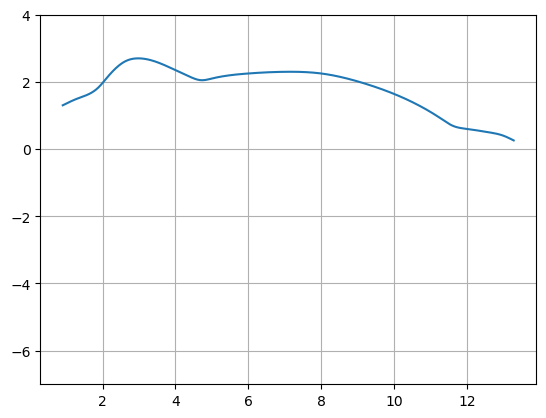

In [851]:
from scipy.interpolate import CubicSpline
xs = np.array([.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7,8,9.2,10.5,11.3,11.6,12,12.6,13,13.3])
ys = np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,.9,.7,.6,.5,.4,.25])
cs = CubicSpline(xs,ys, bc_type='natural', extrapolate=False)
x_vals = np.linspace(-1,15,1000)
plt.plot(x_vals,cs(x_vals))
plt.grid(True)
plt.ylim(-7,4)


CubicSpline es una funcion que nos devuelve una clase, los parámetros que recibe son:

| Parámetro     | Tipo                                    | Descripción                                                                          |
| ------------- | --------------------------------------- | ------------------------------------------------------------------------------------ |
| `x`           | array\_like, shape $(n,)$               | Valores de $x$, deben estar **ordenados crecientemente** y ser únicos.               |
| `y`           | array\_like, shape $(n,) $ o $(..., n)$ | Valores de $y$, puede ser multidimensional. Última dimensión debe coincidir con `x`. |
| `axis`        | int, opcional (default: 0)              | Eje sobre el que se interpola si `y` es multidimensional.                            |
| `bc_type`     | str o tuple, opcional                   | Condición de frontera. Ver detalles abajo.                                           |
| `extrapolate` | bool o `'periodic'`, opcional           | Si se permite extrapolar fuera de los valores de `x`. `True` por defecto.            |


| Valor                    | Significado                                                        |
| ------------------------ | ------------------------------------------------------------------ |
| `'not-a-knot'` (default) | Segunda derivada continua en los puntos intermedios (por defecto). |
| `'natural'`              | Segunda derivada = 0 en los extremos.                              |
| `'clamped'`              | Primera derivada especificada en los extremos.                     |
| `((1, d0), (1, dN))`     | Derivada de orden 1 con valores $d_0$, $d_N$ en los extremos.      |
| `((2, d0), (2, dN))`     | Segunda derivada de orden 2 especificada.                          |
| `'periodic'`             | Asume que la función es periódica.                                 |

Nos devuelve un objeto tipo CubicSpline, con propiedades como c (matriz de coeficientes de las funciones), x (los puntos originales que recibe para interpolar) y extrapolate (para definir si mediante la funcion se puede extrapolar valores) y metodos como: 
| Método                      | Descripción                                                                   |
| --------------------------- | ----------------------------------------------------------------------------- |
| `__call__(x)`               | Evalúa la spline en el punto o array `x`. También se invoca como `cs(x)`.      |
| `derivative(n=1)`           | Devuelve la derivada n-ésima como un nuevo objeto spline.                     |
| `antiderivative(n=1)`       | Devuelve la integral indefinida n-ésima como un nuevo spline.                 |
| `integrate(a, b)`           | Calcula la integral definida del spline entre los puntos `a` y `b`.           |
| `roots()`                   | Devuelve los ceros (raíces) del spline. Solo funciona en 1D.                  |
| `extend(...)`               | Extiende el spline agregando nuevos nodos/puntos.                             |
| `solve(y)`                  | Resuelve la ecuación $S(x) = y$, devolviendo los valores de `x`.              |
| `construct_fast(...)`       | Método interno para construir una spline rápidamente con datos ya procesados. |
| `from_bernstein_basis(...)` | Crea una spline cúbica desde una base de Bernstein.                           |
| `from_spline(...)`          | Convierte otra spline (`BSpline`, por ejemplo) a una `CubicSpline`.           |


## Pruebas

(-5.0, 5.0)

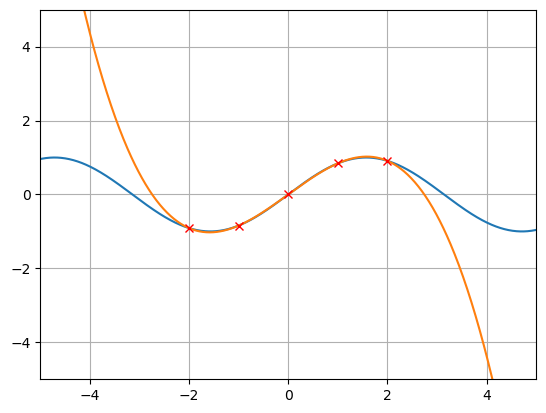

In [733]:
def f(x): return np.sin(x)
xs = np.linspace(-2,2,5)
P = polinomio_lagrange(xs,f(xs))
import matplotlib.pyplot as plt
x_vals = np.linspace(-6,6,1000)
plt.plot(x_vals, f(x_vals))
plt.plot(x_vals, P(x_vals))
plt.plot(xs, f(xs), 'rx')
plt.grid(True)
plt.ylim(-5,5)
plt.xlim(-5,5)

In [735]:
x = np.array([4,-4,7,6,2.])
y = np.array([278,-242,1430,980,40.])
d = dif_divididas(x,y)
print(d)
p = polinomio_newton(d,x)
for i in x:
    print(i,p(i))

[278.   65.   29.    0.4  -0.9]
4.0 277.9999999999999
-4.0 -242.0000000000001
7.0 1430.0
6.0 979.9999999999995
2.0 40.0


# Unidad V - Integracion Numérica